Feature Engineering and Preprocessing

In this section, I will:
1. Simple encode important categorical features
2. Further select features that can do one-hot encoding
    * Group flat_model, flat_model, full_flat_type into flat_type
    * Group towns into regions, and remove postal, and planning_area, mrt_name as redundant features
2. Introduce interaction terms for
    * sec_sch_nearest_distance and cutoff point
3. Drop collinear features
    * year_completed and hdb_age
    * year_completed and lease_commence date
    * remaining_lease_years and lease_commence_date
4. Scale predicted variables 
5. How to deal with outliers
    * Transform outliers with log


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./datasets/clean_data.csv') 

In [3]:
df_pred = pd.read_csv('./datasets/clean_pred_data.csv') 

In [4]:
pd.set_option('display.max_columns', None)
df.head()

Unnamed: 0             town  flat_type  floor_area_sqm  flat_model  \
0           0  KALLANG/WHAMPOA     4 ROOM            90.0     Model A   
1           1           BISHAN     5 ROOM           130.0    Improved   
2           2      BUKIT BATOK  EXECUTIVE           144.0   Apartment   
3           3           BISHAN     4 ROOM           103.0     Model A   
4           4           YISHUN     4 ROOM            83.0  Simplified   

   lease_commence_date  resale_price  Tranc_Year  Tranc_Month  mid  \
0                 2006      680000.0        2016            5   11   
1                 1987      665000.0        2012            7    8   
2                 1997      838000.0        2013            7   14   
3                 1992      550000.0        2012            4    3   
4                 1987      298000.0        2017           12    2   

        full_flat_type  hdb_age  year_completed residential commercial  \
0       4 ROOM Model A       15            2005           Y          N   
1      5 ROOM Improved       34            1987           Y          N   
2  EXECUTIVE Apartment       24            1996           Y          N   
3       4 ROOM Model A       29            1990           Y          Y   
4    4 ROOM Simplified       34            1987           Y          N   

  market_hawker multistorey_carpark precinct_pavilion  total_dwelling_units  \
0             N                   N                 N                   142   
1             N                   N                 N                   112   
2             N                   N                 N                    90   
3             N                   N                 N                    75   
4             N                   N                 N                    48   

   postal planning_area  Mall_Nearest_Distance  Hawker_Nearest_Distance  \
0  382003       Kallang            1094.090418               154.753357   
1  570153        Bishan             866.941448               640.151925   
2  651289   Bukit Batok            1459.579948              1762.082341   
3  570232        Bishan             950.175199               726.215262   
4  760876        Yishun             729.771895              1540.151439   

   mrt_nearest_distance     mrt_name  bus_stop_nearest_distance  \
0            330.083069      Kallang                  29.427395   
1            903.659703       Bishan                  58.207761   
2           1334.251197  Bukit Batok                 214.747860   
3            907.453484       Bishan                  43.396521   
4            412.343032       Khatib                 129.422752   

   pri_sch_nearest_distance  sec_sch_nearest_dist  cutoff_point  \
0               1138.633422           1138.633422           224   
1                415.607357            447.894399           232   
2                498.849039            180.074558           188   
3                389.515528            389.515528           253   
4                401.200584            312.025435           208   

   remaining_lease_years  
0                     83  
1                     64  
2                     74  
3                     69  
4                     64

In [5]:
df_pred.head()

Unnamed: 0      id         town flat_type  floor_area_sqm  \
0           0  114982       YISHUN    4 ROOM            84.0   
1           1   95653  JURONG WEST    5 ROOM           112.0   
2           2   40303   ANG MO KIO    3 ROOM            68.0   
3           3  109506    WOODLANDS    4 ROOM            97.0   
4           4  100149  BUKIT BATOK    4 ROOM           103.0   

          flat_model  lease_commence_date  Tranc_Year  Tranc_Month  mid  \
0         Simplified                 1987        2012           11    8   
1  Premium Apartment                 2008        2019            8    5   
2     New Generation                 1980        2013           10    8   
3     New Generation                 1979        2017           10    2   
4            Model A                 1985        2016            8   17   

             full_flat_type  hdb_age  year_completed residential commercial  \
0         4 ROOM Simplified       34            1986           Y          Y   
1  5 ROOM Premium Apartment       13            2002           Y          N   
2     3 ROOM New Generation       41            1979           Y          N   
3     4 ROOM New Generation       42            1976           Y          N   
4            4 ROOM Model A       36            1985           Y          N   

  market_hawker multistorey_carpark precinct_pavilion  total_dwelling_units  \
0             N                   N                 N                   132   
1             N                   N                 N                    53   
2             N                   N                 N                   218   
3             N                   N                 N                   104   
4             N                   N                 N                   144   

   postal planning_area  Mall_Nearest_Distance  Hawker_Nearest_Distance  \
0  760173        Yishun             877.431572               687.576779   
1  643986   Jurong West             534.037705              2122.346226   
2  560534    Ang Mo Kio             817.050453               152.287621   
3  731029     Woodlands            1272.737194               501.892158   
4  650170   Bukit Batok            1070.963675               437.593564   

   mrt_nearest_distance        mrt_name  bus_stop_nearest_distance  \
0            686.660434        Canberra                  75.683952   
1            169.478175         Pioneer                  88.993058   
2            694.220448      Ang Mo Kio                  86.303575   
3           1117.203587       Marsiling                 108.459039   
4            987.976010  Chinese Garden                 113.645431   

   pri_sch_nearest_distance  sec_sch_nearest_dist  cutoff_point  \
0                426.467910            156.322353           218   
1                439.756851            739.371688           199   
2                355.882207            305.071191           245   
3                929.744711            433.454591           188   
4                309.926934            217.295361           223   

   remaining_lease_years  
0                     64  
1                     85  
2                     57  
3                     56  
4                     62

In [6]:
df.shape

(150634, 30)

In [7]:
df_pred.shape

(16737, 30)

In [8]:
df.drop(columns = ['Unnamed: 0'])

town         flat_type  floor_area_sqm        flat_model  \
0       KALLANG/WHAMPOA            4 ROOM            90.0           Model A   
1                BISHAN            5 ROOM           130.0          Improved   
2           BUKIT BATOK         EXECUTIVE           144.0         Apartment   
3                BISHAN            4 ROOM           103.0           Model A   
4                YISHUN            4 ROOM            83.0        Simplified   
...                 ...               ...             ...               ...   
150629        WOODLANDS         EXECUTIVE           161.0         Apartment   
150630      JURONG WEST            5 ROOM           110.0          Improved   
150631            BEDOK         EXECUTIVE           144.0         Apartment   
150632       QUEENSTOWN            3 ROOM            59.0          Improved   
150633           YISHUN  MULTI-GENERATION           164.0  Multi Generation   

        lease_commence_date  resale_price  Tranc_Year  Tranc_Month  mid  \
0                      2006      680000.0        2016            5   11   
1                      1987      665000.0        2012            7    8   
2                      1997      838000.0        2013            7   14   
3                      1992      550000.0        2012            4    3   
4                      1987      298000.0        2017           12    2   
...                     ...           ...         ...          ...  ...   
150629                 1995      625000.0        2020            9    5   
150630                 2001      455000.0        2017            6    5   
150631                 1993      733000.0        2020           12   11   
150632                 1974      338000.0        2016            5    8   
150633                 1987      765000.0        2018            6    8   

                           full_flat_type  hdb_age  year_completed  \
0                          4 ROOM Model A       15            2005   
1                         5 ROOM Improved       34            1987   
2                     EXECUTIVE Apartment       24            1996   
3                          4 ROOM Model A       29            1990   
4                       4 ROOM Simplified       34            1987   
...                                   ...      ...             ...   
150629                EXECUTIVE Apartment       26            1985   
150630                    5 ROOM Improved       20            1998   
150631                EXECUTIVE Apartment       28            1992   
150632                    3 ROOM Improved       47            1973   
150633  MULTI-GENERATION Multi Generation       34            1987   

       residential commercial market_hawker multistorey_carpark  \
0                Y          N             N                   N   
1                Y          N             N                   N   
2                Y          N             N                   N   
3                Y          Y             N                   N   
4                Y          N             N                   N   
...            ...        ...           ...                 ...   
150629           Y          Y             N                   N   
150630           Y          N             N                   N   
150631           Y          N             N                   N   
150632           Y          N             N                   N   
150633           Y          N             N                   N   

       precinct_pavilion  total_dwelling_units  postal planning_area  \
0                      N                   142  382003       Kallang   
1                      N                   112  570153        Bishan   
2                      N                    90  651289   Bukit Batok   
3                      N                    75  570232        Bishan   
4                      N                    48  760876        Yishun   
...                  ...                   ...     ...           ...   
150629             

In [9]:
df_pred.drop(columns = ['Unnamed: 0'])

id           town flat_type  floor_area_sqm         flat_model  \
0      114982         YISHUN    4 ROOM            84.0         Simplified   
1       95653    JURONG WEST    5 ROOM           112.0  Premium Apartment   
2       40303     ANG MO KIO    3 ROOM            68.0     New Generation   
3      109506      WOODLANDS    4 ROOM            97.0     New Generation   
4      100149    BUKIT BATOK    4 ROOM           103.0            Model A   
...       ...            ...       ...             ...                ...   
16732   23347     ANG MO KIO    3 ROOM            82.0     New Generation   
16733   54003        PUNGGOL    4 ROOM            92.0  Premium Apartment   
16734  128921  CHOA CHU KANG    5 ROOM           110.0           Improved   
16735   69352         BISHAN    4 ROOM            84.0         Simplified   
16736  146210    JURONG WEST    4 ROOM           104.0            Model A   

       lease_commence_date  Tranc_Year  Tranc_Month  mid  \
0                     1987        2012           11    8   
1                     2008        2019            8    5   
2                     1980        2013           10    8   
3                     1979        2017           10    2   
4                     1985        2016            8   17   
...                    ...         ...          ...  ...   
16732                 1980        2016            6    5   
16733                 2012        2017            8   17   
16734                 2002        2018            3    5   
16735                 1988        2020           11    8   
16736                 1990        2012            6    8   

                 full_flat_type  hdb_age  year_completed residential  \
0             4 ROOM Simplified       34            1986           Y   
1      5 ROOM Premium Apartment       13            2002           Y   
2         3 ROOM New Generation       41            1979           Y   
3         4 ROOM New Generation       42            1976           Y   
4                4 ROOM Model A       36            1985           Y   
...                         ...      ...             ...         ...   
16732     3 ROOM New Generation       41            1980           Y   
16733  4 ROOM Premium Apartment        9            2010           Y   
16734           5 ROOM Improved       19            2000           Y   
16735         4 ROOM Simplified       33            1987           Y   
16736            4 ROOM Model A       31            1989           Y   

      commercial market_hawker multistorey_carpark precinct_pavilion  \
0              Y             N                   N                 N   
1              N             N                   N                 N   
2              N             N                   N                 N   
3              N             N                   N                 N   
4              N             N                   N                 N   
...          ...           ...                 ...               ...   
16732          N             N                   N                 N   
16733          N             N                   N                 N   
16734          N             N                   N                 N   
16735          N             N                   N                 N   
16736          Y             N                   N                 N   

       total_dwelling_units  postal  planning_area  Mall_Nearest_Distance  \
0                       132  760173         Yishun             877.431572   
1                        53  643986    Jurong West             534.037705   
2                       218  560534     Ang Mo Kio             817.050453   
3                       104  731029      Woodlands            1272.737194   
4                       144  650170    Bukit Batok            1070.963675   
...                     ...     ...            ...                    ...   
16732                   258  560610     Ang Mo Kio            1120.535819   
16733              

### 1. Do simple encoding on suitable values

In [10]:
df['town'].nunique() # 26 unique values

26

In [11]:
df['planning_area'].nunique() # 32 unique values

32

Since there is more unique values for planning area than town, I will drop planning area and use town for one-hot encoding.
There is still a lot of values that 

In [12]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

town


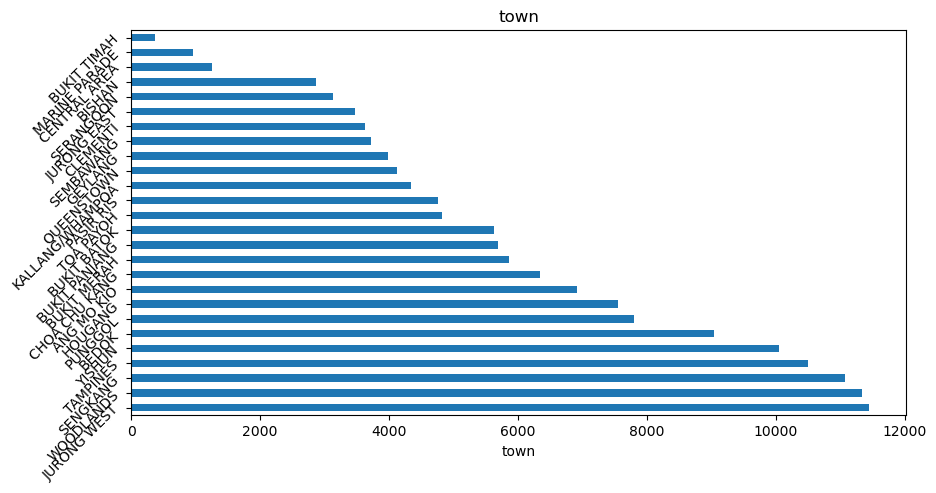

flat_type


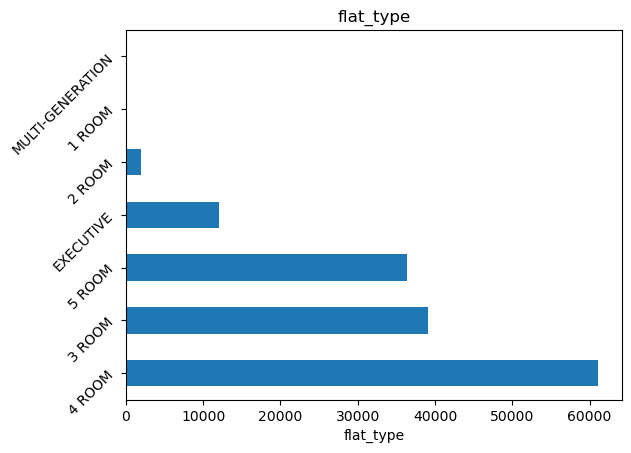

flat_model


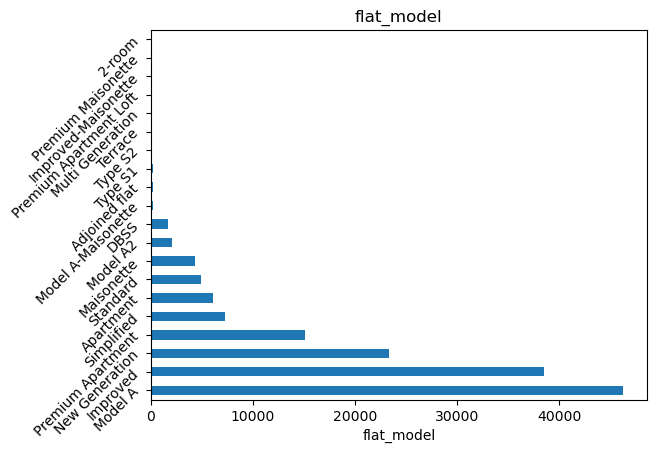

full_flat_type


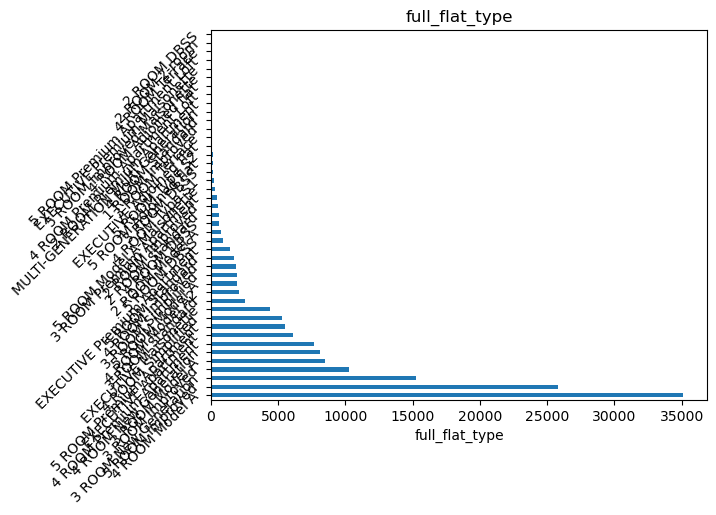

residential


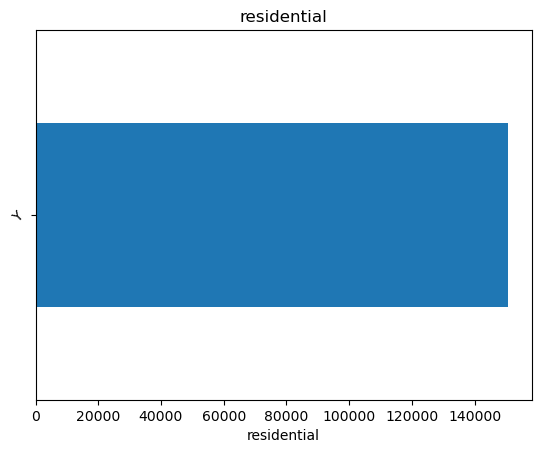

commercial


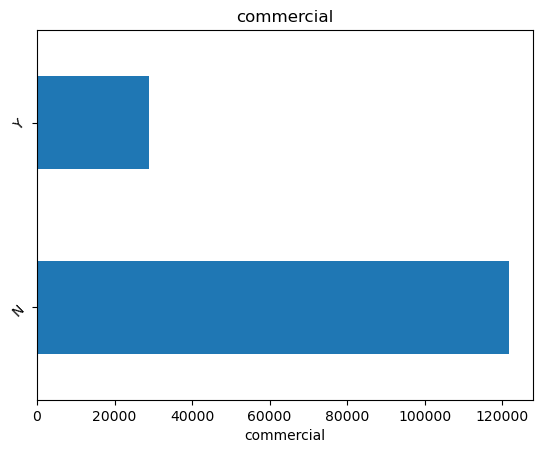

market_hawker


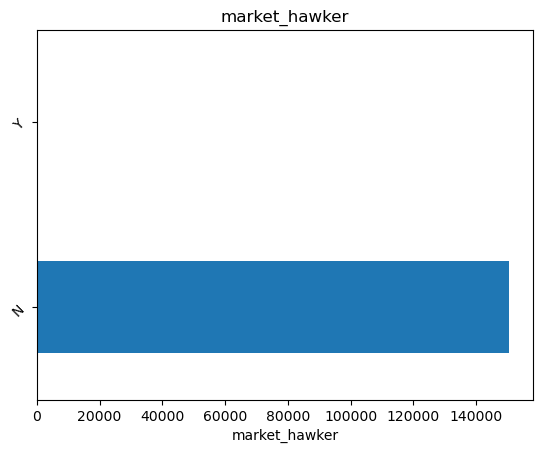

multistorey_carpark


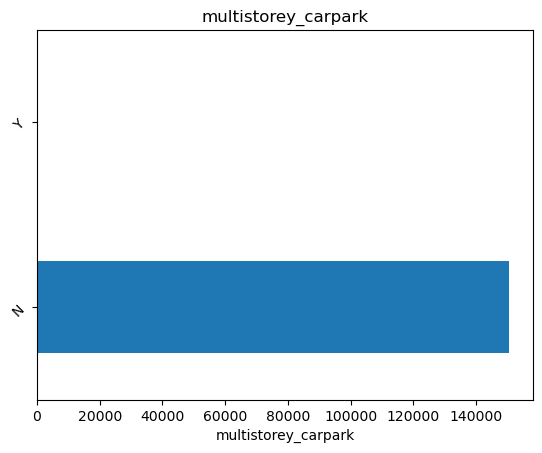

precinct_pavilion


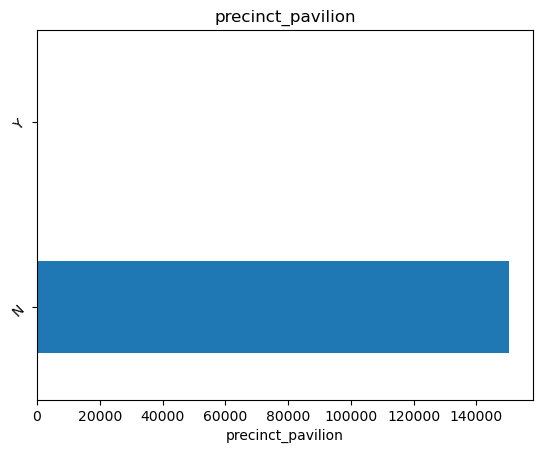

postal


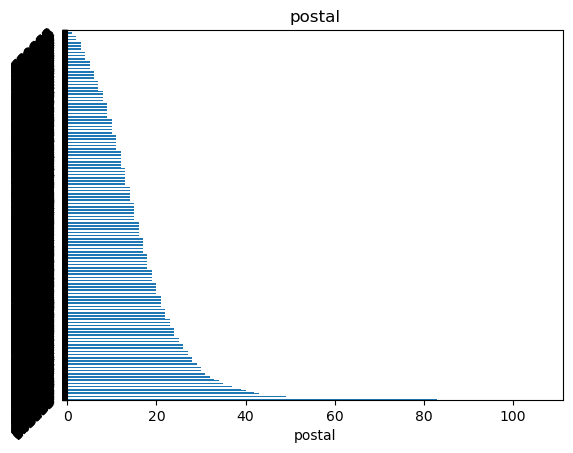

planning_area


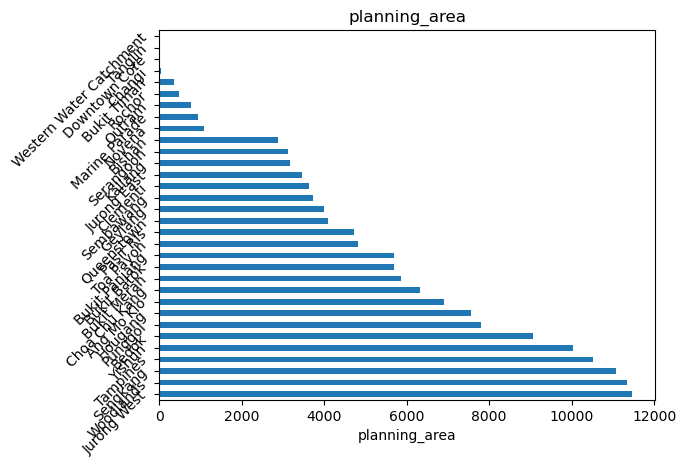

mrt_name


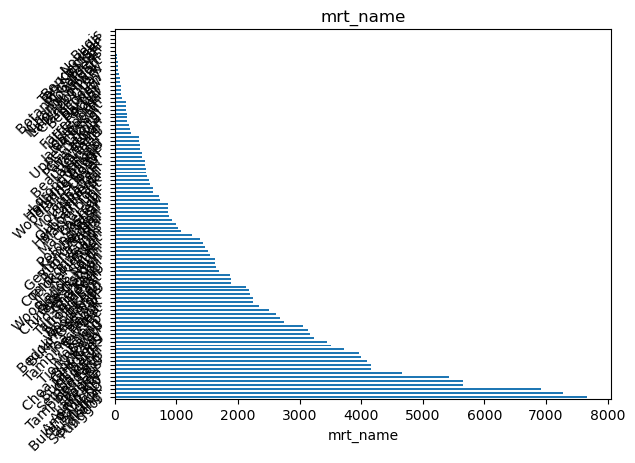

In [13]:
# Frequency plots for catergorical features
fig = plt.figure(figsize=(10,5))
for feature in categorical_features:
    df[feature].value_counts().plot.barh()
    print (feature)
    plt.xlabel(feature)
    plt.yticks(rotation=45)
    plt.title(feature)
    plt.show()

In [14]:
df['residential'].value_counts()

Y    150634
Name: residential, dtype: int64

In [15]:
df['market_hawker'].value_counts()

N    150619
Y        15
Name: market_hawker, dtype: int64

In [16]:
df['multistorey_carpark'].value_counts()

N    150592
Y        42
Name: multistorey_carpark, dtype: int64

In [17]:
df['precinct_pavilion'].value_counts()

N    150499
Y       135
Name: precinct_pavilion, dtype: int64

In [18]:
# drop residential as it have only 1 value; there is no predictive power for these variables
# drop planning_area postal and mrt_name too, since we are going to represent it with town
# drop full_flat_type as there is flat_type and flat_model

df = df.drop(columns = ['residential', 'postal', 'mrt_name', 'full_flat_type', 'planning_area'])

In [19]:
df_pred = df_pred.drop(columns = ['residential', 'postal', 'mrt_name', 'full_flat_type', 'planning_area'])

In [20]:
# perform simple encoding; yes = 1, no = 0
df['commercial'] = df['commercial'].map({'Y': 1, 'N': 0})
df['market_hawker'] = df['market_hawker'].map({'Y': 1, 'N': 0})
df['multistorey_carpark'] = df['multistorey_carpark'].map({'Y': 1, 'N': 0})
df['precinct_pavilion'] = df['precinct_pavilion'].map({'Y': 1, 'N': 0})

In [21]:
# perform simple encoding on preds; yes = 1, no = 0
df_pred['commercial'] = df_pred['commercial'].map({'Y': 1, 'N': 0})
df_pred['market_hawker'] = df_pred['market_hawker'].map({'Y': 1, 'N': 0})
df_pred['multistorey_carpark'] = df_pred['multistorey_carpark'].map({'Y': 1, 'N': 0})
df_pred['precinct_pavilion'] = df_pred['precinct_pavilion'].map({'Y': 1, 'N': 0})

### 2. Re-categorize and encode variables
Before one-hot encoding

In [22]:
df.head()

Unnamed: 0             town  flat_type  floor_area_sqm  flat_model  \
0           0  KALLANG/WHAMPOA     4 ROOM            90.0     Model A   
1           1           BISHAN     5 ROOM           130.0    Improved   
2           2      BUKIT BATOK  EXECUTIVE           144.0   Apartment   
3           3           BISHAN     4 ROOM           103.0     Model A   
4           4           YISHUN     4 ROOM            83.0  Simplified   

   lease_commence_date  resale_price  Tranc_Year  Tranc_Month  mid  hdb_age  \
0                 2006      680000.0        2016            5   11       15   
1                 1987      665000.0        2012            7    8       34   
2                 1997      838000.0        2013            7   14       24   
3                 1992      550000.0        2012            4    3       29   
4                 1987      298000.0        2017           12    2       34   

   year_completed  commercial  market_hawker  multistorey_carpark  \
0            2005           0              0                    0   
1            1987           0              0                    0   
2            1996           0              0                    0   
3            1990           1              0                    0   
4            1987           0              0                    0   

   precinct_pavilion  total_dwelling_units  Mall_Nearest_Distance  \
0                  0                   142            1094.090418   
1                  0                   112             866.941448   
2                  0                    90            1459.579948   
3                  0                    75             950.175199   
4                  0                    48             729.771895   

   Hawker_Nearest_Distance  mrt_nearest_distance  bus_stop_nearest_distance  \
0               154.753357            330.083069                  29.427395   
1               640.151925            903.659703                  58.207761   
2              1762.082341           1334.251197                 214.747860   
3               726.215262            907.453484                  43.396521   
4              1540.151439            412.343032                 129.422752   

   pri_sch_nearest_distance  sec_sch_nearest_dist  cutoff_point  \
0               1138.633422           1138.633422           224   
1                415.607357            447.894399           232   
2                498.849039            180.074558           188   
3                389.515528            389.515528           253   
4                401.200584            312.025435           208   

   remaining_lease_years  
0                     83  
1                     64  
2                     74  
3                     69  
4                     64

In [23]:
# Re-categorize flat model to reduce number of classes
new_flat_models = {'Executive Maisonette':'Maisonette', 'Terrace':'Special', 'Adjoined flat':'Special', 
                    'Type S1S2':'Special', 'DBSS':'Special', 'Model A2':'Model A', 'Premium Apartment':'Apartment', 'Improved':'Standard', 'Simplified':'Model A', '2-room':'Standard'}
df = df.replace({'flat_model': new_flat_models})
df_pred = df_pred.replace({'flat_model': new_flat_models})

In [24]:
df['flat_model'].nunique() # reduced to 13 from 20 unique features

13

In [25]:
# Label encode flat_type
new_flat_type = {'MULTI-GENERATION':6, '1 ROOM': 5, '2 ROOM':4, '3 ROOM':3, '4 ROOM':0, '5 ROOM':1, 'EXECUTIVE':2}
df = df.replace({'flat_type': new_flat_type})
df_pred = df_pred.replace({'flat_type': new_flat_type})

In [26]:
df['town'].unique()

array(['KALLANG/WHAMPOA', 'BISHAN', 'BUKIT BATOK', 'YISHUN', 'GEYLANG',
       'HOUGANG', 'BEDOK', 'SENGKANG', 'TAMPINES', 'SERANGOON',
       'BUKIT MERAH', 'BUKIT PANJANG', 'WOODLANDS', 'JURONG WEST',
       'TOA PAYOH', 'CHOA CHU KANG', 'SEMBAWANG', 'ANG MO KIO',
       'PASIR RIS', 'CLEMENTI', 'PUNGGOL', 'JURONG EAST', 'CENTRAL AREA',
       'QUEENSTOWN', 'BUKIT TIMAH', 'MARINE PARADE'], dtype=object)

In [27]:
df['town'].nunique()

26

In [28]:
df_pred['town'].nunique()

26

To reduce the amount of one-hot encoding on town, I will group them into 5 regions using [the URA list](https://www.newlaunchesreview.com/regions-of-singapore/)

In [29]:
# make town into regions in Singapore

def sg_region(df):
    if df['town'] == 'BISHAN' or df['town'] == 'BUKIT MERAH' or df['town'] == 'GEYLANG' or df['town'] == 'KALLANG/WHAMPOA' or df['town'] == 'MARINE PARADE' or df['town'] == 'QUEENSTOWN' or df['town'] == 'TOA PAYOH' or df['town'] == 'BUKIT TIMAH' or df['town'] == 'CENTRAL AREA':
        return 'Central'
    elif df['town'] == 'BUKIT BATOK' or df['town'] == 'BUKIT PANJANG' or df['town'] == 'CHOA CHU KANG' or df['town']== 'JURONG WEST' or df['town'] == 'JURONG EAST' or df['town'] == 'CLEMENTI' :
        return 'West'
    elif df['town'] == 'BEDOK' or df['town'] == 'PASIR RIS' or df['town'] == 'TAMPINES':
        return 'East'
    elif df['town'] == 'ANG MO KIO' or df['town'] == 'HOUGANG' or df['town'] == 'PUNGGOL' or df['town'] == 'SENGKANG'or df['town'] == 'SERANGOON':
        return 'North East'
    elif df['town'] == 'SEMBAWANG' or df['town'] == 'WOODLANDS' or df['town'] == 'YISHUN':
        return 'North'

df['region'] = df.apply(sg_region, axis = 1)

In [30]:
# make town into regions in Singapore

def sg_region_pred(df):
    if df_pred['town'] == 'BISHAN' or df_pred['town'] == 'BUKIT MERAH' or df_pred['town'] == 'GEYLANG' or df_pred['town'] == 'KALLANG/WHAMPOA' or df_pred['town'] == 'MARINE PARADE' or df_pred['town'] == 'QUEENSTOWN' or df_pred['town'] == 'TOA PAYOH' or df_pred['town'] == 'BUKIT TIMAH' or df_pred['town'] == 'CENTRAL AREA':
        return 'Central'
    elif df_pred['town'] == 'BUKIT BATOK' or df_pred['town'] == 'BUKIT PANJANG' or df_pred['town'] == 'CHOA CHU KANG' or df_pred['town']== 'JURONG WEST' or df_pred['town'] == 'JURONG EAST' or df_pred['town'] == 'CLEMENTI' :
        return 'West'
    elif df_pred['town'] == 'BEDOK' or df_pred['town'] == 'PASIR RIS' or df_pred['town'] == 'TAMPINES':
        return 'East'
    elif df_pred['town'] == 'ANG MO KIO' or df_pred['town'] == 'HOUGANG' or df_pred['town'] == 'PUNGGOL' or df_pred['town'] == 'SENGKANG'or df_pred['town'] == 'SERANGOON':
        return 'North East'
    elif df_pred['town'] == 'SEMBAWANG' or df_pred['town'] == 'WOODLANDS' or df_pred['town'] == 'YISHUN':
        return 'North'

df_pred['region'] = df_pred.apply(sg_region, axis = 1)

In [31]:
df_pred['region'].nunique()

5

In [32]:
df['flat_model'].nunique()

13

In [33]:
# since i do not need town variable anymore, i will drop this variable

df.drop(columns = ['town'], inplace=True)
df_pred.drop(columns = ['town'], inplace=True)

### 3. Perform one-hot encoding

In [34]:
# do one-hot encoding for region
df = pd.get_dummies(df, columns=['region'], prefix=['region'], drop_first=True) # central area as the baseline

In [35]:
df_pred = pd.get_dummies(df_pred, columns=['region'], prefix=['region'], drop_first=True) # same for prediction data

In [36]:
# do one-hot encoding on flat_mode, using Standard as a baseline
df = pd.get_dummies(df, columns=['flat_model'], prefix=['model'])
df= df.drop('model_Standard',axis=1) # remove standard, setting it as the baseline

In [37]:
# do one-hot encoding on flat_mode, using Standard as a baseline
df_pred = pd.get_dummies(df_pred, columns=['flat_model'], prefix=['model'])
df_pred= df_pred.drop('model_Standard',axis=1) # remove standard, setting it as the baseline

### 4. Introduce interaction term
This is introduced to find out the tier of the secondary school, which depends on the cutoff point. The assumption is that higher tier secondary school is more in demand. HDB flats that are closer to such schools might be of higher demand, as shown from the reaction [of the move of ACS to Tengah area](https://www.straitstimes.com/singapore/housing/acs-primary-relocation-likely-to-boost-future-tengah-bto-application-rates-interest-in-bukit-batok-ecs-analysts) 

In [38]:
df['sec_cutoff'] = df['sec_sch_nearest_dist'] * df['cutoff_point']

In [39]:
df_pred['sec_cutoff'] = df_pred['sec_sch_nearest_dist'] * df_pred['cutoff_point']

In [40]:
# check if the interaction term is introduced for train data
df.head()

Unnamed: 0  flat_type  floor_area_sqm  lease_commence_date  resale_price  \
0           0          0            90.0                 2006      680000.0   
1           1          1           130.0                 1987      665000.0   
2           2          2           144.0                 1997      838000.0   
3           3          0           103.0                 1992      550000.0   
4           4          0            83.0                 1987      298000.0   

   Tranc_Year  Tranc_Month  mid  hdb_age  year_completed  commercial  \
0        2016            5   11       15            2005           0   
1        2012            7    8       34            1987           0   
2        2013            7   14       24            1996           0   
3        2012            4    3       29            1990           1   
4        2017           12    2       34            1987           0   

   market_hawker  multistorey_carpark  precinct_pavilion  \
0              0                    0                  0   
1              0                    0                  0   
2              0                    0                  0   
3              0                    0                  0   
4              0                    0                  0   

   total_dwelling_units  Mall_Nearest_Distance  Hawker_Nearest_Distance  \
0                   142            1094.090418               154.753357   
1                   112             866.941448               640.151925   
2                    90            1459.579948              1762.082341   
3                    75             950.175199               726.215262   
4                    48             729.771895              1540.151439   

   mrt_nearest_distance  bus_stop_nearest_distance  pri_sch_nearest_distance  \
0            330.083069                  29.427395               1138.633422   
1            903.659703                  58.207761                415.607357   
2           1334.251197                 214.747860                498.849039   
3            907.453484                  43.396521                389.515528   
4            412.343032                 129.422752                401.200584   

   sec_sch_nearest_dist  cutoff_point  remaining_lease_years  region_East  \
0           1138.633422           224                     83            0   
1            447.894399           232                     64            0   
2            180.074558           188                     74            0   
3            389.515528           253                     69            0   
4            312.025435           208                     64            0   

   region_North  region_North East  region_West  model_Apartment  \
0             0                  0            0                0   
1             0                  0            0                0   
2             0                  0            1                1   
3             0                  0            0                0   
4             1                  0            0                0   

   model_Improved-Maisonette  model_Maisonette  model_Model A  \
0                          0                 0              1   
1                          0                 0              0   
2                          0                 0              0   
3                          0                 0              1   
4                          0                 0              1   

   model_Model A-Maisonette  model_Multi Generation  model_New Generation  \
0                         0                       0                     0   
1                         0                       0                     0   
2                         0                       0                     0   
3                         0                       0                     0   
4                         0                       0                     0   

   model_Premium Apartment Loft  model_Premium Maisonette  model_Special  \


In [41]:
# check if the interaction term is introduced for test data
df_pred.head()

Unnamed: 0      id  flat_type  floor_area_sqm  lease_commence_date  \
0           0  114982          0            84.0                 1987   
1           1   95653          1           112.0                 2008   
2           2   40303          3            68.0                 1980   
3           3  109506          0            97.0                 1979   
4           4  100149          0           103.0                 1985   

   Tranc_Year  Tranc_Month  mid  hdb_age  year_completed  commercial  \
0        2012           11    8       34            1986           1   
1        2019            8    5       13            2002           0   
2        2013           10    8       41            1979           0   
3        2017           10    2       42            1976           0   
4        2016            8   17       36            1985           0   

   market_hawker  multistorey_carpark  precinct_pavilion  \
0              0                    0                  0   
1              0                    0                  0   
2              0                    0                  0   
3              0                    0                  0   
4              0                    0                  0   

   total_dwelling_units  Mall_Nearest_Distance  Hawker_Nearest_Distance  \
0                   132             877.431572               687.576779   
1                    53             534.037705              2122.346226   
2                   218             817.050453               152.287621   
3                   104            1272.737194               501.892158   
4                   144            1070.963675               437.593564   

   mrt_nearest_distance  bus_stop_nearest_distance  pri_sch_nearest_distance  \
0            686.660434                  75.683952                426.467910   
1            169.478175                  88.993058                439.756851   
2            694.220448                  86.303575                355.882207   
3           1117.203587                 108.459039                929.744711   
4            987.976010                 113.645431                309.926934   

   sec_sch_nearest_dist  cutoff_point  remaining_lease_years  region_East  \
0            156.322353           218                     64            0   
1            739.371688           199                     85            0   
2            305.071191           245                     57            0   
3            433.454591           188                     56            0   
4            217.295361           223                     62            0   

   region_North  region_North East  region_West  model_Apartment  \
0             1                  0            0                0   
1             0                  0            1                1   
2             0                  1            0                0   
3             1                  0            0                0   
4             0                  0            1                0   

   model_Improved-Maisonette  model_Maisonette  model_Model A  \
0                          0                 0              1   
1                          0                 0              0   
2                          0                 0              0   
3                          0                 0              0   
4                          0                 0              1   

   model_Model A-Maisonette  model_Multi Generation  model_New Generation  \
0                         0                       0                     0   
1                         0                       0                     0   
2                         0                       0                     1   
3                         0                       0                     1   
4                         0                       0                     0   

   model_Premium Apartment Loft  model_Premium Maisonette  model_Special  \
0                             0     

### 5. Find out more from the train data of the 

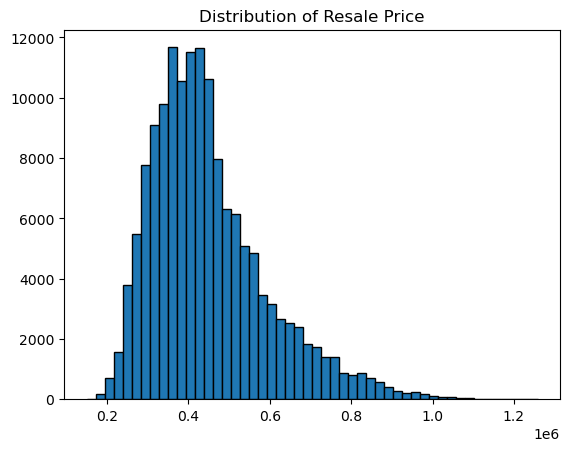

In [47]:
# check the distribution of resale_price

plt.hist(df['resale_price'], bins=50, edgecolor='black')
plt.title('Distribution of Resale Price')
plt.show()
#display(prices[prices['floor_area_sqm'] > 200]['flat_model'].value_counts())

In [48]:
# transform data with logarithmic transformation

# resale_price
df['resale_price']=np.log(df['resale_price'])

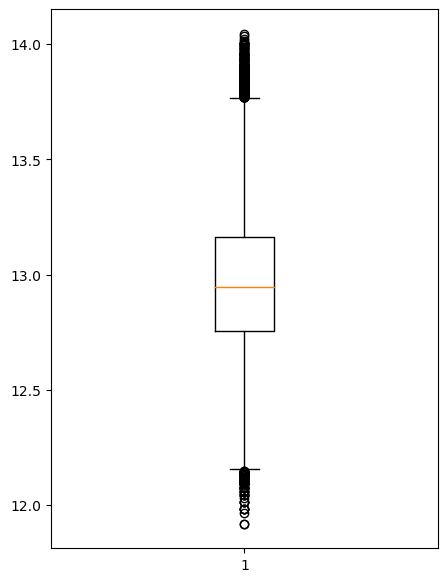

In [49]:
# plot a boxplot of resale_price data: 
plt.figure(figsize = (5,7))
bp = plt.boxplot(data=df, x='resale_price')

# need to find a way to deal with / account for outliers 
# find IQR upper and lower
# slice data by town
# slice data by the size of hdb

Text(0.5, 1.0, 'Distribution of Resale Price')

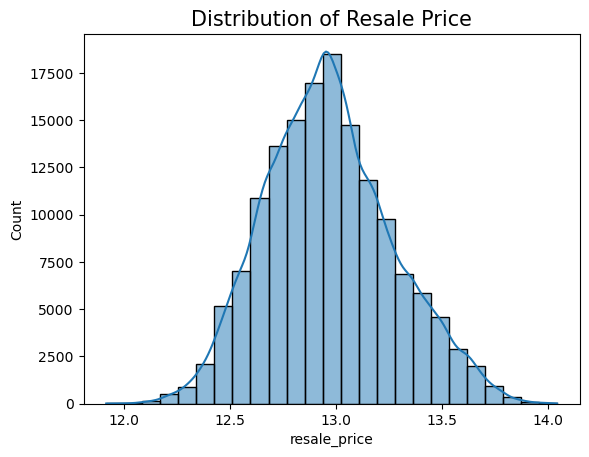

In [50]:
# find out the distribution of resale_price

sns.histplot(data=df, x='resale_price', bins =25, kde=True)
plt.title('Distribution of Resale Price', fontsize=15)

# after transforming the variable, the distribution becomes normal

In [51]:
df.head()

Unnamed: 0  flat_type  floor_area_sqm  lease_commence_date  resale_price  \
0           0          0            90.0                 2006     13.429848   
1           1          1           130.0                 1987     13.407542   
2           2          2           144.0                 1997     13.638773   
3           3          0           103.0                 1992     13.217674   
4           4          0            83.0                 1987     12.604849   

   Tranc_Year  Tranc_Month  mid  hdb_age  year_completed  commercial  \
0        2016            5   11       15            2005           0   
1        2012            7    8       34            1987           0   
2        2013            7   14       24            1996           0   
3        2012            4    3       29            1990           1   
4        2017           12    2       34            1987           0   

   market_hawker  multistorey_carpark  precinct_pavilion  \
0              0                    0                  0   
1              0                    0                  0   
2              0                    0                  0   
3              0                    0                  0   
4              0                    0                  0   

   total_dwelling_units  Mall_Nearest_Distance  Hawker_Nearest_Distance  \
0                   142            1094.090418               154.753357   
1                   112             866.941448               640.151925   
2                    90            1459.579948              1762.082341   
3                    75             950.175199               726.215262   
4                    48             729.771895              1540.151439   

   mrt_nearest_distance  bus_stop_nearest_distance  pri_sch_nearest_distance  \
0            330.083069                  29.427395               1138.633422   
1            903.659703                  58.207761                415.607357   
2           1334.251197                 214.747860                498.849039   
3            907.453484                  43.396521                389.515528   
4            412.343032                 129.422752                401.200584   

   sec_sch_nearest_dist  cutoff_point  remaining_lease_years  region_East  \
0           1138.633422           224                     83            0   
1            447.894399           232                     64            0   
2            180.074558           188                     74            0   
3            389.515528           253                     69            0   
4            312.025435           208                     64            0   

   region_North  region_North East  region_West  model_Apartment  \
0             0                  0            0                0   
1             0                  0            0                0   
2             0                  0            1                1   
3             0                  0            0                0   
4             1                  0            0                0   

   model_Improved-Maisonette  model_Maisonette  model_Model A  \
0                          0                 0              1   
1                          0                 0              0   
2                          0                 0              0   
3                          0                 0              1   
4                          0                 0              1   

   model_Model A-Maisonette  model_Multi Generation  model_New Generation  \
0                         0                       0                     0   
1                         0                       0                     0   
2                         0                       0                     0   
3                         0                       0                     0   
4                         0                       0                     0   

   model_Premium Apartment Loft  model_Premium Maisonette  model_Special  \


In [52]:
df.drop(columns = ['Unnamed: 0'], inplace=True)

In [53]:
# save it to the csv file
df.to_csv('./datasets/preprocessed_train_data.csv', index=False)

In [54]:
df.head()

flat_type  floor_area_sqm  lease_commence_date  resale_price  Tranc_Year  \
0          0            90.0                 2006     13.429848        2016   
1          1           130.0                 1987     13.407542        2012   
2          2           144.0                 1997     13.638773        2013   
3          0           103.0                 1992     13.217674        2012   
4          0            83.0                 1987     12.604849        2017   

   Tranc_Month  mid  hdb_age  year_completed  commercial  market_hawker  \
0            5   11       15            2005           0              0   
1            7    8       34            1987           0              0   
2            7   14       24            1996           0              0   
3            4    3       29            1990           1              0   
4           12    2       34            1987           0              0   

   multistorey_carpark  precinct_pavilion  total_dwelling_units  \
0                    0                  0                   142   
1                    0                  0                   112   
2                    0                  0                    90   
3                    0                  0                    75   
4                    0                  0                    48   

   Mall_Nearest_Distance  Hawker_Nearest_Distance  mrt_nearest_distance  \
0            1094.090418               154.753357            330.083069   
1             866.941448               640.151925            903.659703   
2            1459.579948              1762.082341           1334.251197   
3             950.175199               726.215262            907.453484   
4             729.771895              1540.151439            412.343032   

   bus_stop_nearest_distance  pri_sch_nearest_distance  sec_sch_nearest_dist  \
0                  29.427395               1138.633422           1138.633422   
1                  58.207761                415.607357            447.894399   
2                 214.747860                498.849039            180.074558   
3                  43.396521                389.515528            389.515528   
4                 129.422752                401.200584            312.025435   

   cutoff_point  remaining_lease_years  region_East  region_North  \
0           224                     83            0             0   
1           232                     64            0             0   
2           188                     74            0             0   
3           253                     69            0             0   
4           208                     64            0             1   

   region_North East  region_West  model_Apartment  model_Improved-Maisonette  \
0                  0            0                0                          0   
1                  0            0                0                          0   
2                  0            1                1                          0   
3                  0            0                0                          0   
4                  0            0                0                          0   

   model_Maisonette  model_Model A  model_Model A-Maisonette  \
0                 0              1                         0   
1                 0              0                         0   
2                 0              0                         0   
3                 0              1                         0   
4                 0              1                         0   

   model_Multi Generation  model_New Generation  model_Premium Apartment Loft  \
0                       0                     0                             0   
1                       0                     0                             0   
2                       0                     0                             0   
3                       0                     0                             0   
4                       0                     0   

In [55]:
df_pred.head()

Unnamed: 0      id  flat_type  floor_area_sqm  lease_commence_date  \
0           0  114982          0            84.0                 1987   
1           1   95653          1           112.0                 2008   
2           2   40303          3            68.0                 1980   
3           3  109506          0            97.0                 1979   
4           4  100149          0           103.0                 1985   

   Tranc_Year  Tranc_Month  mid  hdb_age  year_completed  commercial  \
0        2012           11    8       34            1986           1   
1        2019            8    5       13            2002           0   
2        2013           10    8       41            1979           0   
3        2017           10    2       42            1976           0   
4        2016            8   17       36            1985           0   

   market_hawker  multistorey_carpark  precinct_pavilion  \
0              0                    0                  0   
1              0                    0                  0   
2              0                    0                  0   
3              0                    0                  0   
4              0                    0                  0   

   total_dwelling_units  Mall_Nearest_Distance  Hawker_Nearest_Distance  \
0                   132             877.431572               687.576779   
1                    53             534.037705              2122.346226   
2                   218             817.050453               152.287621   
3                   104            1272.737194               501.892158   
4                   144            1070.963675               437.593564   

   mrt_nearest_distance  bus_stop_nearest_distance  pri_sch_nearest_distance  \
0            686.660434                  75.683952                426.467910   
1            169.478175                  88.993058                439.756851   
2            694.220448                  86.303575                355.882207   
3           1117.203587                 108.459039                929.744711   
4            987.976010                 113.645431                309.926934   

   sec_sch_nearest_dist  cutoff_point  remaining_lease_years  region_East  \
0            156.322353           218                     64            0   
1            739.371688           199                     85            0   
2            305.071191           245                     57            0   
3            433.454591           188                     56            0   
4            217.295361           223                     62            0   

   region_North  region_North East  region_West  model_Apartment  \
0             1                  0            0                0   
1             0                  0            1                1   
2             0                  1            0                0   
3             1                  0            0                0   
4             0                  0            1                0   

   model_Improved-Maisonette  model_Maisonette  model_Model A  \
0                          0                 0              1   
1                          0                 0              0   
2                          0                 0              0   
3                          0                 0              0   
4                          0                 0              1   

   model_Model A-Maisonette  model_Multi Generation  model_New Generation  \
0                         0                       0                     0   
1                         0                       0                     0   
2                         0                       0                     1   
3                         0                       0                     1   
4                         0                       0                     0   

   model_Premium Apartment Loft  model_Premium Maisonette  model_Special  \
0                             0     

In [56]:
df_pred.drop(columns = ['Unnamed: 0'], inplace=True)

In [57]:
df_pred.to_csv('./datasets/preprocessed_test_data.csv', index=False)

In [58]:
df_pred.head()

id  flat_type  floor_area_sqm  lease_commence_date  Tranc_Year  \
0  114982          0            84.0                 1987        2012   
1   95653          1           112.0                 2008        2019   
2   40303          3            68.0                 1980        2013   
3  109506          0            97.0                 1979        2017   
4  100149          0           103.0                 1985        2016   

   Tranc_Month  mid  hdb_age  year_completed  commercial  market_hawker  \
0           11    8       34            1986           1              0   
1            8    5       13            2002           0              0   
2           10    8       41            1979           0              0   
3           10    2       42            1976           0              0   
4            8   17       36            1985           0              0   

   multistorey_carpark  precinct_pavilion  total_dwelling_units  \
0                    0                  0                   132   
1                    0                  0                    53   
2                    0                  0                   218   
3                    0                  0                   104   
4                    0                  0                   144   

   Mall_Nearest_Distance  Hawker_Nearest_Distance  mrt_nearest_distance  \
0             877.431572               687.576779            686.660434   
1             534.037705              2122.346226            169.478175   
2             817.050453               152.287621            694.220448   
3            1272.737194               501.892158           1117.203587   
4            1070.963675               437.593564            987.976010   

   bus_stop_nearest_distance  pri_sch_nearest_distance  sec_sch_nearest_dist  \
0                  75.683952                426.467910            156.322353   
1                  88.993058                439.756851            739.371688   
2                  86.303575                355.882207            305.071191   
3                 108.459039                929.744711            433.454591   
4                 113.645431                309.926934            217.295361   

   cutoff_point  remaining_lease_years  region_East  region_North  \
0           218                     64            0             1   
1           199                     85            0             0   
2           245                     57            0             0   
3           188                     56            0             1   
4           223                     62            0             0   

   region_North East  region_West  model_Apartment  model_Improved-Maisonette  \
0                  0            0                0                          0   
1                  0            1                1                          0   
2                  1            0                0                          0   
3                  0            0                0                          0   
4                  0            1                0                          0   

   model_Maisonette  model_Model A  model_Model A-Maisonette  \
0                 0              1                         0   
1                 0              0                         0   
2                 0              0                         0   
3                 0              0                         0   
4                 0              1                         0   

   model_Multi Generation  model_New Generation  model_Premium Apartment Loft  \
0                       0                     0                             0   
1                       0                     0                             0   
2                       0                     1                             0   
3                       0                     1                             0   
4                       0                     0                             0   

   model